findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


/Users/cql/Desktop/learning_note/GEMM/scripts


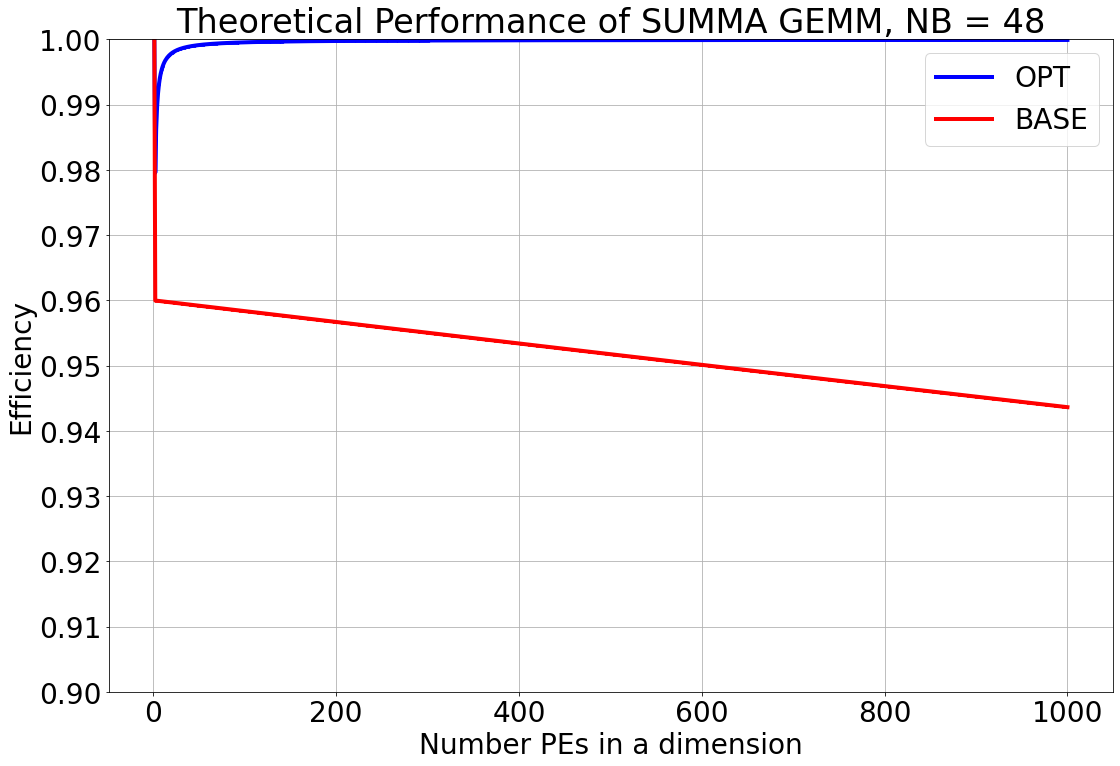

In [1]:
import numpy as np
import sys 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os
from array import *
import math
import matplotlib.dates as mdate
import matplotlib.ticker as mtick
import itertools
from matplotlib import pyplot
from matplotlib.pyplot import MultipleLocator

print(Path.cwd())
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

############################################################
# 1 node of different tile size
# 
############################################################

# Plot
size = 28
line_width = 4
marker_size = 28
# size of x-axis and y-axis
mpl.rcParams['xtick.labelsize'] = size
mpl.rcParams['ytick.labelsize'] = size

NB = 48
NB2 = 40
s = 1000

x = [i for i in range(1, s+1)]
y = [0.0 for _ in range(s)]
y_basis = [0.0 for _ in range(s)]


for i in range(1, s+1):
    y[i-1] = NB**3 * i / (NB**3 * i + 2 * (i-1+NB**2))
    y_basis[i-1] = NB**3 * i / (NB**3 * i + 2* i * (i-1+NB**2)) 

y[0] = 1
y_basis[0] = 1
#print('x', x)
#print('y', y)



fig, ax = plt.subplots(figsize=(18,12))
ax.set_xlabel('Number PEs in a dimension', fontsize=size)
ax.set_ylabel('Efficiency', fontsize=size)


line1 = ax.plot(x, y, "-", marker='v', markersize=2,
                linewidth=line_width, color='b', label='OPT')
line2 = ax.plot(x, y_basis, "-", marker='v', markersize=2,
                linewidth=line_width, color='r', label='BASE')

ax.grid(True)
#ax.set_yscale('log')


#plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : size}
plt.rc('font', **font)


y_major_locator=MultipleLocator(0.01)
ax.yaxis.set_major_locator(y_major_locator)
ax.set_ylim(0.9, 1)


#ax.set_xscale('log')

plt.tick_params(labelsize=size)
ax.legend(loc='best', ncol = 1)
ax.set_title('Theoretical Performance of SUMMA GEMM, NB = 48')

#plt.savefig("../figures/cannon_cost_opt.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("../figures/summa_cost.pdf", dpi=300, bbox_inches='tight')

plt.show()

